In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
20,12July_gpt2_10dim_12layer_256_RL,linear_regression,Transformer,,-1,-1,10,12,8,12July_gpt2_10dim_12layer_256_RL
22,12July_mlp_10dim_10layer_1024_RL,linear_regression,12July_mlp_10dim_10layer_1024_RL,,-1,-1,10,10,8,12July_mlp_10dim_10layer_1024_RL
25,12July_mlp_10dim_10layer_512_RL,linear_regression,12July_mlp_10dim_10layer_512_RL,,-1,-1,10,10,8,12July_mlp_10dim_10layer_512_RL
21,12July_mlp_10dim_22layer_1024_RL,linear_regression,12July_mlp_10dim_22layer_1024_RL,,-1,-1,10,22,8,12July_mlp_10dim_22layer_1024_RL
23,12July_mlp_10dim_5layer_1024_RL,linear_regression,12July_mlp_10dim_5layer_1024_RL,,-1,-1,10,5,8,12July_mlp_10dim_5layer_1024_RL
24,12July_mlp_10dim_5layer_512_RL,linear_regression,12July_mlp_10dim_5layer_512_RL,,-1,-1,10,5,8,12July_mlp_10dim_5layer_512_RL
36,14Aug_15points_lstm_20dim_5layer_512_lr0.0001_...,linear_regression,14Aug_15points_lstm_20dim_5layer_512_lr0.0001_...,,-1,-1,20,5,8,14Aug_15points_lstm_20dim_5layer_512_lr0.0001_...
27,14Aug_20points_lstm_20dim_5layer_512_lr0.0001_...,linear_regression,14Aug_20points_lstm_20dim_5layer_512_lr0.0001_...,,-1,-1,20,5,8,14Aug_20points_lstm_20dim_5layer_512_lr0.0001_...
51,14Aug_30points_lstm_20dim_5layer_512_lr0.0001_...,linear_regression,14Aug_30points_lstm_20dim_5layer_512_lr0.0001_...,,-1,-1,20,5,8,14Aug_30points_lstm_20dim_5layer_512_lr0.0001_...
35,14Aug_lstm_20dim_10layer_256_lr0.0001_dropout0...,linear_regression,14Aug_lstm_20dim_10layer_256_lr0.0001_dropout0...,,-1,-1,20,10,8,14Aug_lstm_20dim_10layer_256_lr0.0001_dropout0...


In [ ]:
"""
in our case, use linear regression
"""

task = "linear_regression" 
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

"""
Replace run_id
"""
run_id = "15Aug_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

15Aug_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse 15Aug_lstm_20dim_5layer_512_lr0.0001_dropout0.1_curriculumFalse_p_embeddingFalse


100%|██████████| 15/15 [00:00<00:00, 207638.81it/s]

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [0.9485498428344726, 0.9599717140197754, 0.9511673927307129, 0.8632013320922851, 0.8142643928527832, 0.7117433071136474, 0.732870626449585, 0.7038616180419922, 0.6370944023132324, 0.5870398044586181, 0.5248034477233887, 0.5256053924560546, 0.47005548477172854, 0.4438943386077881, 0.45311765670776366, 0.3423855543136597, 0.30924742221832274, 0.31200668811798093, 0.2752771615982056, 0.24887986183166505, 0.22312681674957274, 0.21222870349884032, 0.19337495565414428, 0.17200858592987062, 0.1554907441139221, 0.14392478466033937, 0.1356954336166382, 0.12308783531188965, 0.10863673686981201, 0.09665172696113586, 0.08419374227523804, 0.09142690896987915, 0.07924249768257141, 0.07521365284919738, 0.06312052607536316, 0.06300513744354248, 0.05897662043571472, 0.05790138244628906, 0.05350351333618164, 0.05385485887527466, 0.046332639455795285], 'std': [1.4092421531677246, 1.458042716979980

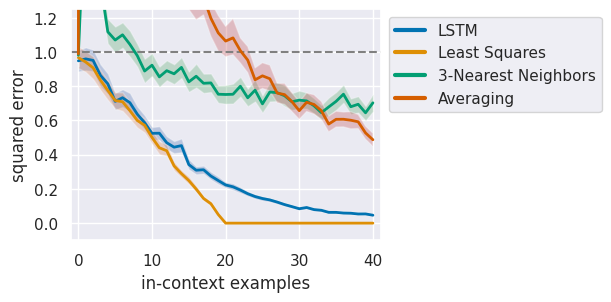

In [ ]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)

plt.show()

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [1.0245442390441895, 0.9153020858764649, 0.9011125564575195, 0.7043322086334228, 0.6857401847839355, 0.5332906723022461, 0.4536256790161133, 0.4011712551116943, 0.31224446296691893, 0.2593590021133423, 0.19689862728118895, 0.17711721658706664, 0.13577511310577392, 0.11338529586791993, 0.0808299422264099, 0.065340656042099, 0.06512601375579834, 0.046383053064346313, 0.04233189523220062, 0.0403536319732666, 0.03761458694934845, 0.030371183156967164, 0.028134140372276305, 0.026984944939613342, 0.026171207427978516, 0.024120450019836426, 0.026461178064346315, 0.024275413155555724, 0.02213854491710663, 0.024677011370658874, 0.02335602045059204, 0.02380060702562332, 0.024085554480552673, 0.02517184615135193, 0.027114024758338927, 0.0258092075586319, 0.02463407814502716, 0.026010632514953613, 0.026965421438217164, 0.026601442694664003, 0.026213163137435914], 'std': [1.6367528915405274,

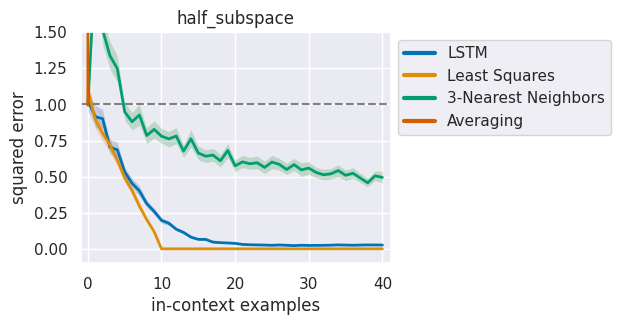

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [1.0837958335876465, 0.9444660186767578, 0.8325599670410156, 0.9142134666442872, 0.8158138275146485, 0.799072265625, 0.78794846534729, 0.6967077732086182, 0.6955668449401855, 0.5611564636230468, 0.5985602378845215, 0.5634340763092041, 0.5008339881896973, 0.524327564239502, 0.4572451591491699, 0.4108772277832031, 0.39231171607971194, 0.3621325731277466, 0.3656132936477661, 0.3678241729736328, 0.3171874523162842, 0.29976630210876465, 0.2897177696228027, 0.2703940629959106, 0.2566986083984375, 0.24957339763641356, 0.24865214824676513, 0.22957172393798828, 0.21821606159210205, 0.21013779640197755, 0.20873312950134276, 0.18959810733795165, 0.18517720699310303, 0.17856481075286865, 0.17009700536727906, 0.1825673460960388, 0.1599137544631958, 0.15810595750808715, 0.1613081693649292, 0.16427018642425537, 0.15193027257919312], 'std': [1.7029684066772461, 1.4555699348449707, 1.31797323226

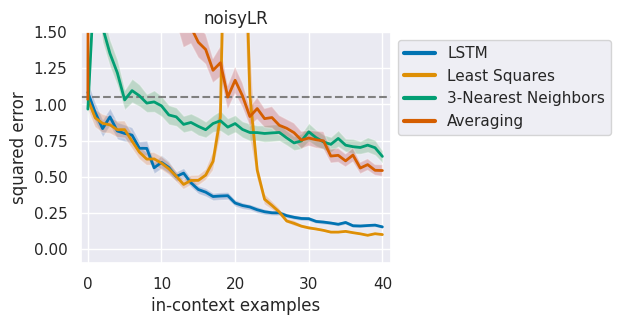

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [1.0809528350830078, 1.0034344673156739, 1.0197588920593261, 1.0263027191162108, 1.0355806350708008, 1.0829786300659179, 0.956794261932373, 1.0153592109680176, 1.049211597442627, 1.0175516128540039, 0.9477391242980957, 0.9696928024291992, 1.028403377532959, 1.0389338493347169, 1.0636140823364257, 1.08829984664917, 1.0618382453918458, 1.0539460182189941, 1.0236143112182616, 1.058924674987793, 0.0010026553645730019, 0.0009635034948587418, 0.0009733306244015694, 0.0009456707164645195, 0.0009240307845175266, 0.0009250033646821976, 0.0009416445158421993, 0.0008576071821153163, 0.0008284260518848896, 0.000877256691455841, 0.0009030641987919808, 0.0008575335144996643, 0.000882082711905241, 0.000898233987390995, 0.0007879538461565971, 0.0008313601836562156, 0.0008300687186419964, 0.0008311718702316284, 0.0007483039982616902, 0.0007499213330447674, 0.0007623353507369756], 'std': [1.62112

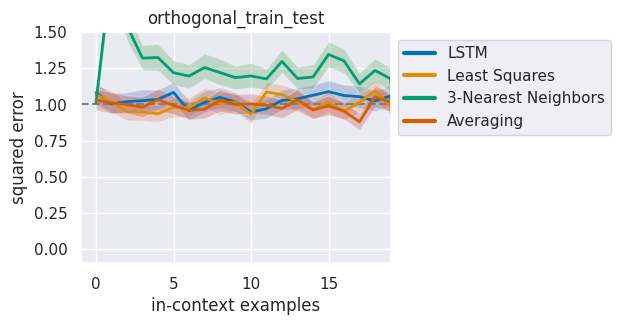

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [1.0046083450317382, 0.00807454138994217, 0.007644791901111603, 0.011177190393209458, 0.011673434823751449, 0.012864091992378235, 0.016285930573940278, 0.01995096355676651, 0.02138892710208893, 0.022209799289703368, 0.023540320992469787, 0.028255367279052736, 0.030483323335647582, 0.02896202206611633, 0.029379725456237793, 0.035176721215248105, 0.03247900903224945, 0.03626778721809387, 0.036575493216514585, 0.04246087074279785, 0.03834728598594665, 0.03943136930465698, 0.03891831338405609, 0.039413702487945554, 0.037852293252944945, 0.035454285144805905, 0.03591682016849518, 0.03687622249126434, 0.036877840757369995, 0.03367510437965393, 0.03391242325305939, 0.03355512022972107, 0.03257001638412475, 0.029592758417129515, 0.02877066731452942, 0.02784177362918854, 0.027257317304611207, 0.026673486828804015, 0.02934582233428955, 0.02542651295661926, 0.024002155661582945], 'std': [1

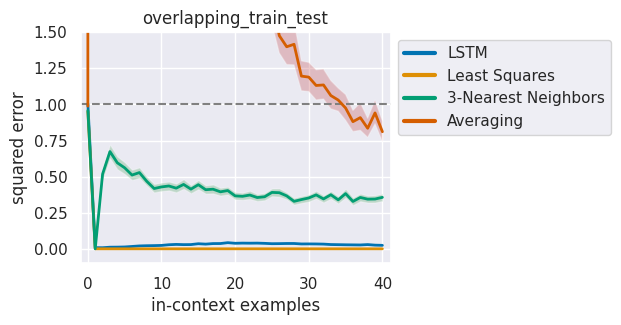

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [1.1086166381835938, 0.8770142555236816, 0.8853896141052247, 0.8578315734863281, 0.7741165161132812, 0.7563389778137207, 0.7452154636383057, 0.7060260772705078, 0.6264014720916748, 0.66346116065979, 0.6315651893615722, 0.5594180583953857, 0.5571585178375245, 0.53797926902771, 0.4777237892150879, 0.5181970119476318, 0.4531437873840332, 0.4429518699645996, 0.4277791500091553, 0.39931747913360593, 0.3499816179275513, 0.36313838958740235, 0.3762171268463135, 0.31836562156677245, 0.37032673358917234, 0.3324984073638916, 0.3130249738693237, 0.33114147186279297, 0.29649720191955564, 0.305849027633667, 0.2866480350494385, 0.2786844491958618, 0.2647887706756592, 0.2773486375808716, 0.2766115665435791, 0.2895982027053833, 0.26633739471435547, 0.29602603912353515, 0.2747742414474487, 0.27179152965545655, 0.2391796112060547], 'std': [1.6080808639526367, 1.303783130645752, 1.35925235748291, 

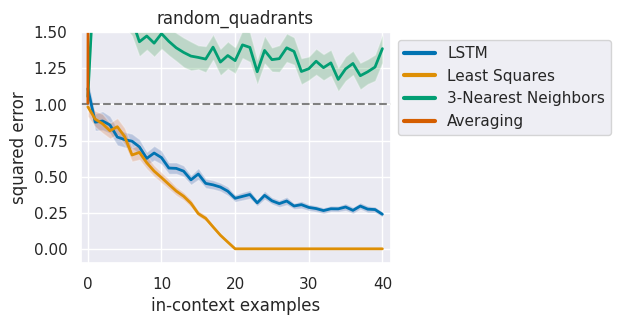

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [0.10598751306533813, 0.09510353803634644, 0.10134108066558838, 0.0989179015159607, 0.0905402958393097, 0.09515048265457153, 0.0810315728187561, 0.07415172457695007, 0.07699702978134156, 0.07568184137344361, 0.06833470463752747, 0.06719977259635926, 0.059482520818710326, 0.060314005613327025, 0.0667666494846344, 0.0595306396484375, 0.05768175721168518, 0.0605392336845398, 0.06015666127204895, 0.06151760220527649, 0.059505796432495116, 0.06051841974258423, 0.057371461391448976, 0.06009417772293091, 0.06298741698265076, 0.062157005071640015, 0.059643900394439696, 0.06052616238594055, 0.06191421151161194, 0.059646707773208615, 0.06733156442642212, 0.0601107120513916, 0.06052291989326477, 0.06110208034515381, 0.06118147969245911, 0.058611446619033815, 0.06829882860183716, 0.06653475761413574, 0.0661993145942688, 0.0674458086490631, 0.07260174155235291], 'std': [0.16196264028549195, 

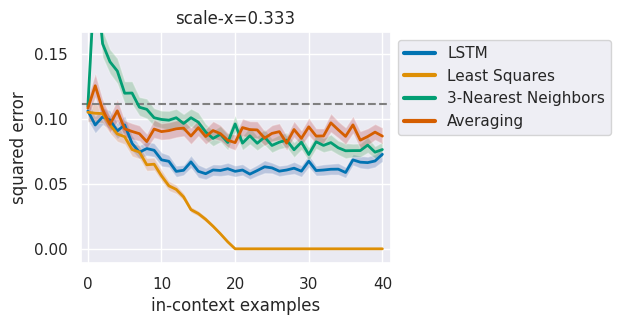

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [0.23398633003234864, 0.24238107204437256, 0.2198549747467041, 0.21045565605163574, 0.18502323627471923, 0.15918688774108886, 0.18826847076416015, 0.1762976288795471, 0.1629352569580078, 0.14912583827972412, 0.14852322340011598, 0.12862763404846192, 0.12755539417266845, 0.12155801057815552, 0.11025362014770508, 0.09957535862922669, 0.09984327554702759, 0.08324995040893554, 0.08562206029891968, 0.08547852635383606, 0.07217913866043091, 0.07086527943611146, 0.06840173602104187, 0.0655835747718811, 0.05516155958175659, 0.05260598659515381, 0.052700364589691163, 0.04754796922206879, 0.04413082599639893, 0.039411145448684695, 0.03975317776203156, 0.03847912847995758, 0.03612721562385559, 0.03425612449645996, 0.030417972803115846, 0.02900124192237854, 0.028374674916267394, 0.02600686252117157, 0.027760353684425355, 0.026836496591567994, 0.02373174875974655], 'std': [0.3443126440048217

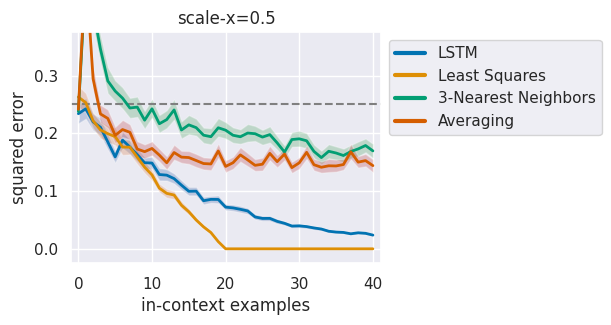

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [4.221191787719727, 3.6632305145263673, 3.5504428863525392, 3.2019989013671877, 3.2366970062255858, 2.9239780426025392, 2.9018829345703123, 2.8005924224853516, 2.6682260513305662, 2.543880081176758, 2.256954002380371, 2.1037517547607423, 2.016497039794922, 1.9251749038696289, 1.8397167205810547, 1.558796501159668, 1.5539871215820313, 1.5906664848327636, 1.4109031677246093, 1.329212474822998, 1.2206335067749023, 1.1573766708374023, 1.124894905090332, 1.0033360481262208, 0.9381780624389648, 0.9761686325073242, 0.8281801223754883, 0.743895435333252, 0.7634345054626465, 0.7099674224853516, 0.6464680671691895, 0.6565313816070557, 0.5940105438232421, 0.57561354637146, 0.5184878349304199, 0.5095475196838379, 0.47104716300964355, 0.4784096717834473, 0.46479110717773436, 0.430728816986084, 0.4279299736022949], 'std': [6.285749053955078, 5.890938186645508, 5.135837173461914, 4.93251075744

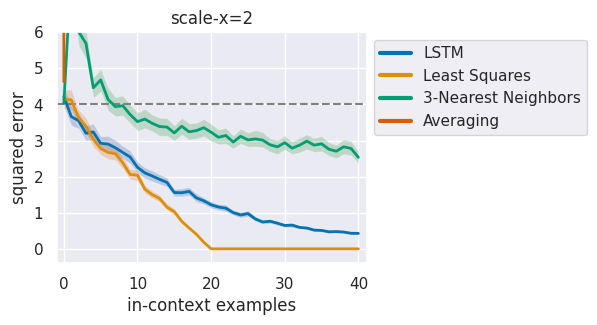

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [8.398905944824218, 8.976810455322266, 8.27545623779297, 7.740144348144531, 7.46578369140625, 7.04263916015625, 6.901078796386718, 6.5714256286621096, 6.159019851684571, 6.1716766357421875, 6.278277587890625, 5.230014801025391, 5.114310455322266, 4.715692520141602, 5.089023590087891, 4.525699615478516, 4.284904861450196, 4.310048675537109, 4.052252960205078, 3.6708251953125, 3.7407501220703123, 3.5947410583496096, 3.2491214752197264, 3.396251678466797, 3.0128787994384765, 2.860917091369629, 3.02280330657959, 2.7655828475952147, 2.771307945251465, 2.7115102767944337, 2.544460678100586, 2.57727108001709, 2.5297054290771483, 2.266109848022461, 2.288716506958008, 2.2206844329833983, 2.3254283905029296, 2.189717483520508, 2.307289695739746, 2.0276586532592775, 1.9809860229492187], 'std': [13.753863525390624, 12.359989166259766, 13.319273376464844, 11.687325286865235, 11.4736907958984

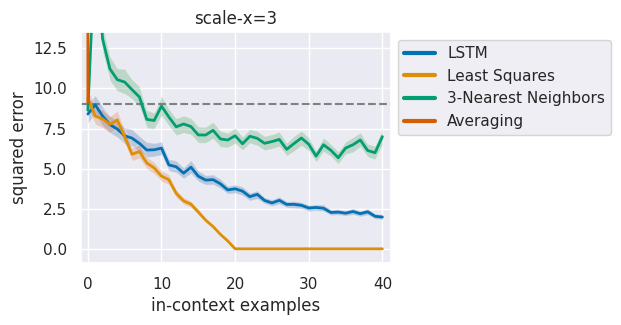

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [0.10790694952011108, 0.10639394521713257, 0.09541033506393433, 0.09634976387023926, 0.09557973146438599, 0.08100889325141906, 0.07610931992530823, 0.07834383249282836, 0.07026941180229188, 0.06710843443870544, 0.06649134159088135, 0.056470286846160886, 0.050675982236862184, 0.05310999155044556, 0.04581896662712097, 0.04637060761451721, 0.04317534863948822, 0.037860235571861266, 0.035471534729003905, 0.030472344160079955, 0.033967393636703494, 0.029470151662826537, 0.025858807563781738, 0.02330687493085861, 0.024278219044208526, 0.022360606491565703, 0.022212329506874084, 0.020233817398548126, 0.017714057862758637, 0.01721660643815994, 0.01836337149143219, 0.016270551085472106, 0.014262731373310088, 0.01426604986190796, 0.014379052817821503, 0.01412154734134674, 0.012966357171535492, 0.011979112774133683, 0.011977710574865342, 0.011031112819910049, 0.010796044766902924], 'std': 

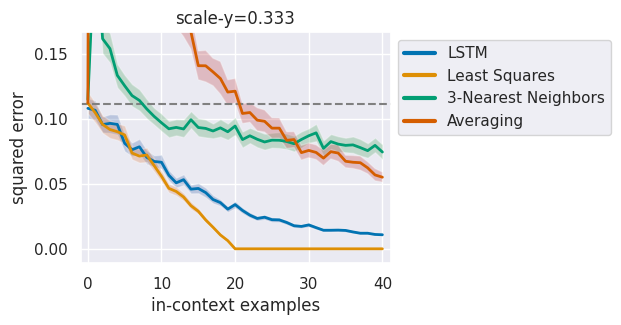

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [0.2538414478302002, 0.2386157274246216, 0.24129226207733154, 0.2181779384613037, 0.2146669864654541, 0.20370357036590575, 0.18910099267959596, 0.18362114429473878, 0.15900371074676514, 0.15652700662612914, 0.13237682580947877, 0.13764288425445556, 0.12181789875030517, 0.11497799158096314, 0.10343352556228638, 0.09341405034065246, 0.08185012936592102, 0.07884973287582397, 0.06920963525772095, 0.06845237612724304, 0.0659066915512085, 0.06041859388351441, 0.04799977242946625, 0.046787649393081665, 0.04527159333229065, 0.041954487562179565, 0.0348067045211792, 0.03482350409030914, 0.0298539936542511, 0.028606542944908143, 0.02754269540309906, 0.024418672919273375, 0.023054173588752745, 0.021686825156211852, 0.020683872699737548, 0.019329318404197694, 0.018726573884487153, 0.01744939535856247, 0.01748754233121872, 0.01514654904603958, 0.014624735713005066], 'std': [0.378449416160583

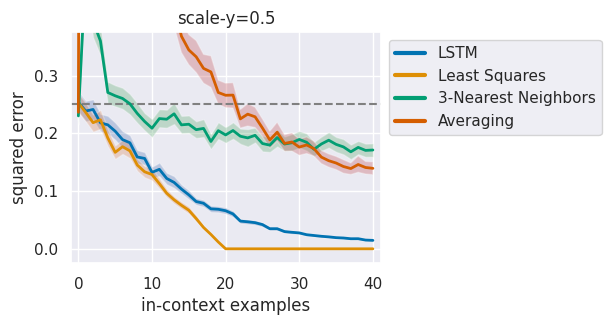

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [4.084688186645508, 3.9144775390625, 3.6867332458496094, 3.438207244873047, 3.1310022354125975, 2.8859848022460937, 3.1202869415283203, 2.6597244262695314, 2.6146896362304686, 2.3415996551513674, 2.1521800994873046, 1.9559545516967773, 2.08111457824707, 1.7895074844360352, 1.7422868728637695, 1.4502145767211914, 1.421637725830078, 1.3626569747924804, 1.3072580337524413, 1.1787968635559083, 1.0522775650024414, 0.999082374572754, 0.8779052734375, 0.9108601570129394, 0.8694285392761231, 0.7837625026702881, 0.7505106925964355, 0.6749829769134521, 0.6023297309875488, 0.6089503288269043, 0.5544190406799316, 0.5392537117004395, 0.5089770317077636, 0.49373316764831543, 0.5270777702331543, 0.4403398036956787, 0.48137626647949217, 0.4468508720397949, 0.4078819274902344, 0.4121837615966797, 0.38440139293670655], 'std': [6.239643859863281, 5.909962844848633, 5.321603393554687, 4.96124725341

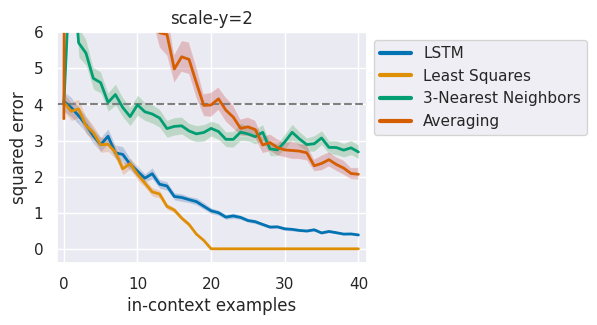

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [9.309469604492188, 8.922074890136718, 7.548338317871094, 7.787617492675781, 7.480745697021485, 7.258165740966797, 6.751341247558594, 6.236832809448242, 6.479371643066406, 5.5910076141357425, 5.310235595703125, 5.603218460083008, 5.012466812133789, 4.617200469970703, 4.5381416320800785, 4.35614242553711, 4.42073974609375, 3.7545845031738283, 3.6561717987060547, 3.885224533081055, 3.7491069793701173, 3.3479999542236327, 3.4302330017089844, 3.3468746185302733, 3.1371326446533203, 2.890090560913086, 2.738315391540527, 2.7132373809814454, 2.713479232788086, 2.7588932037353517, 2.6296777725219727, 2.516852378845215, 2.5660884857177733, 2.4599636077880858, 2.4484081268310547, 2.326015281677246, 2.509284019470215, 2.5338211059570312, 2.330769157409668, 2.2674539566040037, 2.309975242614746], 'std': [13.402159118652344, 12.469575500488281, 12.1773193359375, 11.464310455322266, 11.838251

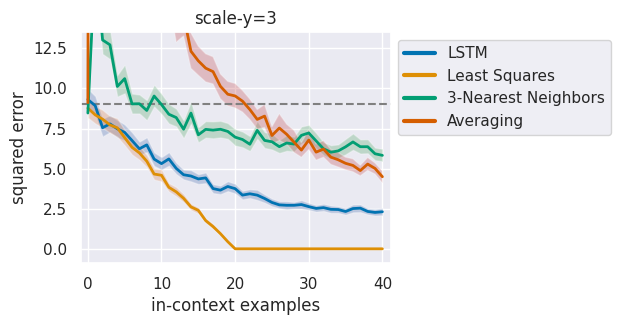

DEBUG: models ['LSTM', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'LSTM': {'mean': [1.0977455139160157, 0.6383257389068604, 0.47132554054260256, 0.39189715385437013, 0.2792933940887451, 0.23914673328399658, 0.22208054065704347, 0.18551185131072997, 0.1668936491012573, 0.16424068212509155, 0.13949819803237914, 0.13750840425491334, 0.14726461172103883, 0.11503703594207763, 0.13817968368530273, 0.11799200773239135, 0.13152792453765869, 0.12622690200805664, 0.12432913780212403, 0.12519866228103638, 0.11939709186553955, 0.12923132181167601, 0.1394640326499939, 0.11894038915634156, 0.12203893661499024, 0.12159844636917114, 0.13009793758392335, 0.12702515125274658, 0.1289016604423523, 0.12777968645095825, 0.12264796495437622, 0.12914050817489625, 0.12987722158432008, 0.12774312496185303, 0.11556384563446045, 0.12260026931762695, 0.12938463687896729, 0.125014591217041, 0.12985395193099974, 0.1313314437866211, 0.1287132978439331], 'std': [2.528635787963867, 1.254635334

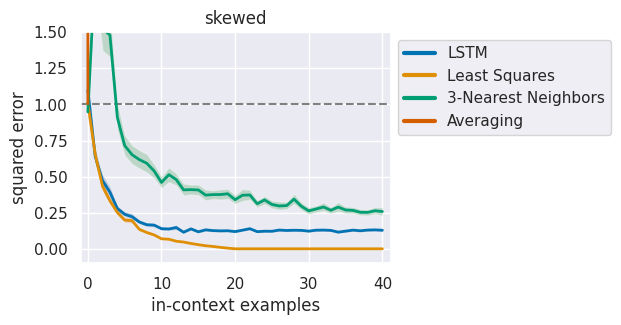

In [ ]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [ ]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [ ]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [ ]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [ ]:
with torch.no_grad():

    pred = model(xs, ys)

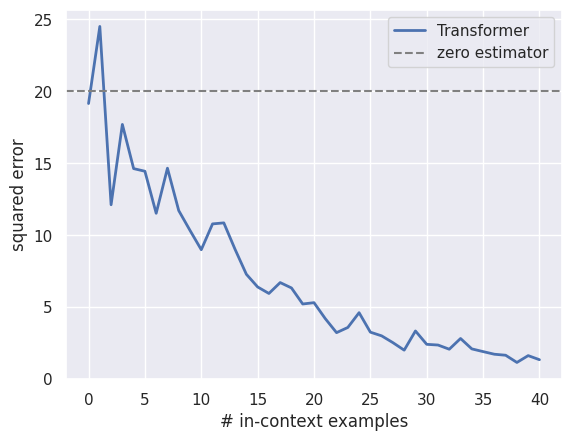

In [ ]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [ ]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

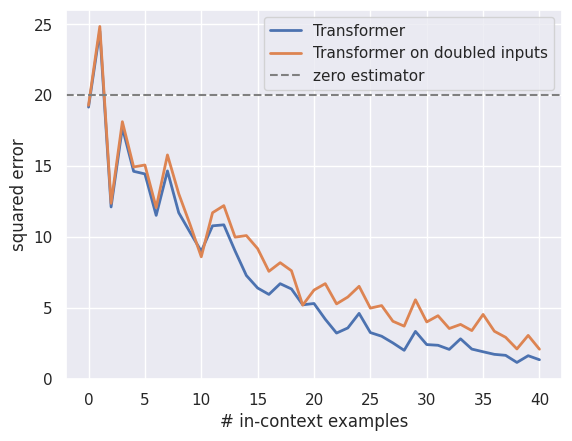

In [ ]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.